# Manifolds

### Newton's big mistake on color
Most of us are familiar with Newton's theory of white light consisting of a mixture of colors, with each wavelength corresponding to a color. As proof, he offered the observation that white light when passing through a prism is decomposed into a bands of different colors. This is because eeach color is a slightly different wavelength, the prism refracts (bends) the light at that wavelength a little different, making land shifted relative to the other colors at different wavelength. <br>

This idea isn't necessarily untrue, but it falls short at explaining human color vision. First, not all colors are visible when light is refracted by a prism. In addition, even the colors that are visible aren't tight to these pure wavelengths. There are many different ways a certain shade of green can be perceived. What matters is the distribution of power (read: strength) across the wavelengths of visible light, called a spectral density function. The human visual system integrates this spectrum into 3 numbers, representing the three cone receptors. Humans are trichromatic, meaning we have three different cone receptors that have a sensitivity profile that peak at different wavelength. People are tempted to refer to these three cones as 'red', 'green' and 'blue'. However, that too isn't really a good description. The sensitivities of the cones are similar and overlap quite a bit. To complicate matters further, the cones do not only signal color (or what we actually call hue), the also signal the saturation (how faded vs brilliant a color appears) and luminance, or brigthness. You can compare brigthness to a dimmer switch. Increasing the voltage increases the brightness of a red bulb, but it doesn't change its color (it doesn't all of a sudden becomes more yellowish or purple-ish) and it doesn't change its saturation (at lower light levels, the red doesn't start to fade to gray, it just appears dimmer. So, when we say hue, we mean the 'redness' or 'greenness' of a color, independent of its brightness and saturation. have a look at figure 8.1 where we change the three aspects independently. We create these colors in a color space in which hue, saturation and luminance are made to be orthogonal, so you can independently move along the three axis. This isn't possible for our more familiar RGB triplets, as we shall see. The space is called CIE LAB, you can find more info on this here: https://en.wikipedia.org/wiki/CIELAB_color_space. 

### Import

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color

### Fonts

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Parameters

In [3]:
high_res = 121
low_res = 11
a_width_left = 25
b_width_left = 25
a_width_right = 55
b_width_right = 55
lum_min = 30
lum_max = 90
lum_mid = 60

### Create LAB Hue space (highres)

In [154]:
A,B = np.meshgrid(np.linspace(-a_width_left,a_width_right,121),np.linspace(-b_width_left,b_width_right,high_res))
LAB = np.zeros((high_res,high_res,3))
LAB[:,:,0] = lum_mid;
LAB[:,:,1] = A;
LAB[:,:,2] = B;
RGBhue = color.lab2rgb(LAB);

### Create LAB Luminance planes (lowres)

In [155]:
AB,lum = np.meshgrid(np.linspace(-a_width_left,a_width_right,121),np.linspace(lum_max,lum_min,high_res))
LAB = np.zeros((high_res,high_res,3))
LAB[:,:,0] = lum;
LAB[:,:,1] = AB;
LAB[:,:,2] = 0;
RGBlumA = color.lab2rgb(LAB);

AB,lum = np.meshgrid(np.linspace(-a_width_left,a_width_right,121),np.linspace(lum_max,lum_min,high_res))
LAB = np.zeros((high_res,high_res,3))
LAB[:,:,0] = lum;
LAB[:,:,1] = 0;
LAB[:,:,2] = AB;
RGBlumB = color.lab2rgb(LAB);

### Create LAB Hue space (lowres)

In [190]:
A,B = np.meshgrid(np.linspace(-a_width_left,a_width_right,low_res),np.linspace(-b_width_left,b_width_right,low_res))
LAB = np.zeros((low_res,low_res,3))
LAB[:,:,0] = lum_mid;
LAB[:,:,1] = A;
LAB[:,:,2] = B;
RGBhue = color.lab2rgb(LAB);

### Create LAB Luminance planes (lowres)

In [191]:
AB,lum = np.meshgrid(np.linspace(-a_width_left,a_width_right,low_res),np.linspace(lum_max,lum_min,low_res))
LAB = np.zeros((low_res,low_res,3))
LAB[:,:,0] = lum;
LAB[:,:,1] = AB;
LAB[:,:,2] = 0;
RGBlumA = color.lab2rgb(LAB);

AB,lum = np.meshgrid(np.linspace(-a_width_left,a_width_right,low_res),np.linspace(lum_max,lum_min,low_res))
LAB = np.zeros((low_res,low_res,3))
LAB[:,:,0] = lum;
LAB[:,:,1] = 0;
LAB[:,:,2] = AB;
RGBlumB = color.lab2rgb(LAB);

### Plot 2D

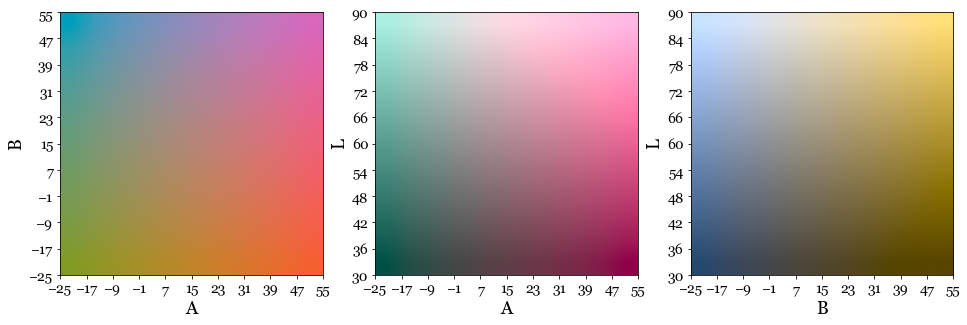

In [211]:
np.linspace(-b_width_left,b_width_right,11)
plt.figure(figsize=(16,10))
np.linspace(lum_max,lum_min,low_res)

plt.subplot(1,3,1)
plt.xlabel('A',fontsize=18,**csfont)
plt.ylabel('B',fontsize=18,**csfont)
plt.xticks(np.linspace(-a_width_left,a_width_right,low_res),fontsize=14,**csfont);
plt.yticks(np.linspace(-b_width_left,b_width_right,low_res),fontsize=14,**csfont);
plt.imshow(RGBhue,interpolation='bilinear',extent=(-a_width_left,a_width_right,-b_width_left,b_width_right));

plt.subplot(1,3,2)
plt.xlabel('A',fontsize=18,**csfont)
plt.ylabel('L',fontsize=18,**csfont)
plt.xticks(np.linspace(-a_width_left,a_width_right,low_res),fontsize=14,**csfont);
plt.yticks(np.linspace(10,90,low_res),labels=np.linspace(lum_min,lum_max,low_res).astype(int),fontsize=14,**csfont);
plt.imshow(RGBlumA,interpolation='bilinear',extent=(-a_width_left,a_width_right,10,90));

plt.subplot(1,3,3)
plt.xlabel('B',fontsize=18,**csfont)
plt.ylabel('L',fontsize=18,**csfont)
plt.xticks(np.linspace(-b_width_left,b_width_right,low_res),fontsize=14,**csfont);
plt.yticks(np.linspace(10,90,low_res),labels=np.linspace(lum_min,lum_max,low_res).astype(int),fontsize=14,**csfont);
plt.imshow(RGBlumB,interpolation='bilinear',extent=(-b_width_left,b_width_right,10,90));
plt.savefig('../../assets/figures/008/colormap_manifold_0.png',dpi=300,bbox_inches="tight")

### Plot 3D RGB cube

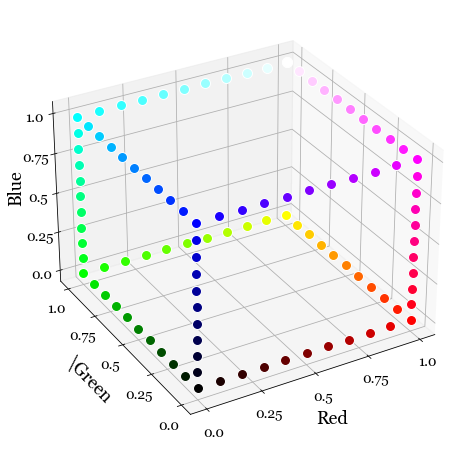

In [224]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
for i in range(11):
    xval = i / 10
    ax.scatter(xval,0,0,color=(xval,0,0),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(0,xval,0,color=(0,xval,0),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(0,0,xval,color=(0,0,xval),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(xval,1,0,color=(xval,1,0),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(1,xval,0,color=(1,xval,0),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(0,0,xval,color=(0,0,xval),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(1,xval,1,color=(1,xval,1),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(0,1,xval,color=(0,1,xval),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(1,0,xval,color=(1,0,xval),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(xval,1,1,color=(xval,1,1),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(0,xval,1,color=(0,xval,1),edgecolor='w',s=100,alpha=1.0)
    ax.scatter(xval,0,1,color=(xval,0,1),edgecolor='w',s=100,alpha=1.0)
ax.view_init(elev=30., azim=240)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_xticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.zaxis.set_rotate_label(False) 
ax.set_ylabel('\n\Green',fontsize=18,**csfont)
ax.set_xlabel('\nRed',fontsize=18,**csfont)
ax.set_zlabel('Blue', rotation=90,fontsize=18,**csfont)
plt.savefig('../../assets/figures/008/colormap_manifold_1.png',dpi=300,bbox_inches="tight")

### Plot 3D Hue Manifold

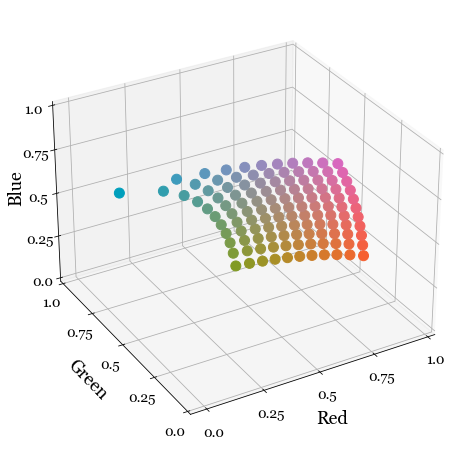

In [227]:
R = RGBhue[:,:,0].flatten()
G = RGBhue[:,:,1].flatten()
B = RGBhue[:,:,2].flatten()
C = np.reshape(RGBhue,(RGBhue.shape[0]*RGBhue.shape[0],3))

plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(R,G,B,c=C,s=100,alpha=1.0)
ax.view_init(elev=30., azim=240)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_xticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.zaxis.set_rotate_label(False) 
ax.set_ylabel('\nGreen',fontsize=18,**csfont)
ax.set_xlabel('\nRed',fontsize=18,**csfont)
ax.set_zlabel('Blue', rotation=90,fontsize=18,**csfont)
plt.savefig('../../assets/figures/008/colormap_manifold_2.png',dpi=300,bbox_inches="tight")

### Plot Luminance and A channel manifold

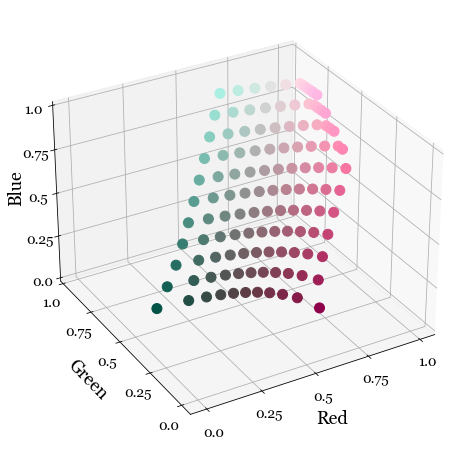

In [228]:
R = RGBlumA[:,:,0].flatten()
G = RGBlumA[:,:,1].flatten()
B = RGBlumA[:,:,2].flatten()
C = np.reshape(RGBlumA,(RGBlumA.shape[0]*RGBlumA.shape[0],3))
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(R,G,B,c=C,s=100,alpha=1.0)
ax.view_init(elev=30., azim=240)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_xticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.zaxis.set_rotate_label(False) 
ax.set_ylabel('\nGreen',fontsize=18,**csfont)
ax.set_xlabel('\nRed',fontsize=18,**csfont)
ax.set_zlabel('Blue', rotation=90,fontsize=18,**csfont)
plt.savefig('../../assets/figures/008/colormap_manifold_3.png',dpi=300,bbox_inches="tight")

### Plot Luminance and B channel manifold

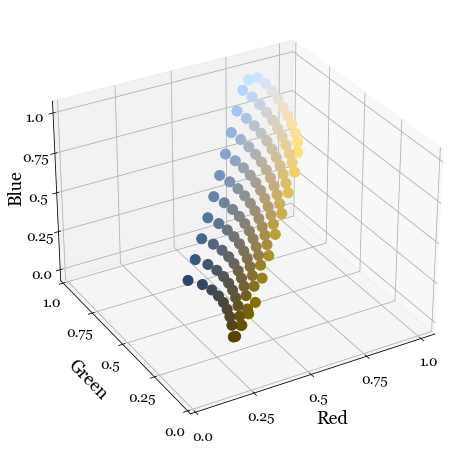

In [229]:
R = RGBlumB[:,:,0].flatten()
G = RGBlumB[:,:,1].flatten()
B = RGBlumB[:,:,2].flatten()
C = np.reshape(RGBlumB,(RGBlumB.shape[0]*RGBlumB.shape[0],3))
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(R,G,B,c=C,s=100,alpha=1.0)
ax.view_init(elev=30., azim=240)
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
ax.set_xticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_yticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.set_zticks(np.linspace(0,1,5),labels=np.linspace(0,1,5),fontsize=14,**csfont);
ax.zaxis.set_rotate_label(False) 
ax.set_ylabel('\nGreen',fontsize=18,**csfont)
ax.set_xlabel('\nRed',fontsize=18,**csfont)
ax.set_zlabel('Blue', rotation=90,fontsize=18,**csfont)
plt.savefig('../../assets/figures/008/colormap_manifold_4.png',dpi=300,bbox_inches="tight")